### Predicting if a person would buy life insurance based on his age using logistic regression.
Binary Logistic Regression -> i.e. if person buys insurance or he/she doesn't

In [26]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [27]:
df = pd.read_csv("insurance_data.csv")
df.head(5)

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


Scatter plot

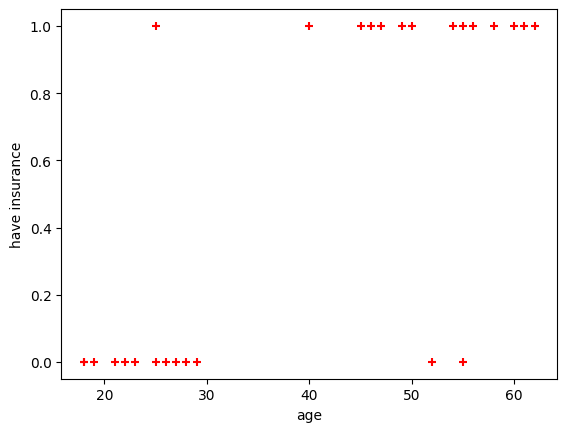

In [28]:
%matplotlib inline
plt.xlabel('age')
plt.ylabel('have insurance')
plt.scatter(df.age, df.bought_insurance, marker='+', color='red')

Train test split (80/20)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size=0.8, random_state=10)

In [45]:
X_train.head(5)

,age
2,47
12,27
24,50
14,49
13,29


In [46]:
X_test

,age
7,60
5,56
18,19
21,26
11,28
1,25


Model training

In [47]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_predicted = model.predict(X_test)
y_predicted

array([1, 1, 0, 0, 0, 0], dtype=int64)

In [49]:
model.predict([[43]])

c:\Users\Hp\Documents\GitHub\practice-ml\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [50]:
y_test

7     1
5     1
18    0
21    0
11    0
1     0
Name: bought_insurance, dtype: int64

Predict probability

In [51]:
model.predict_proba(X_test)

array([[0.07149837, 0.92850163],
       [0.10786034, 0.89213966],
       [0.88695424, 0.11304576],
       [0.78083769, 0.21916231],
       [0.73981335, 0.26018665],
       [0.79952571, 0.20047429]])

In [52]:
model.score(X_test, y_test)

1.0

model.coef_ --> value of m in y=m*x + b eq.

In [53]:
model.coef_

array([[0.112778]])

model.intercept_ --> value of b in y=m*x + b eq.

In [54]:
model.intercept_

array([-4.20278276])

## define sigmoid function from scratch
just for understanding and knowledge

In [59]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [65]:
def prediction_function(age):
    z = 0.11 * age - 4.20 # 0.112778 ~ 0.11 and -4.20278276 ~ -4.20
    y = sigmoid(z)
    return y

where 
* model.coeff_ = 0.112778 ~ 0.11
* model.intercept_ = -4.20278276 ~ -4.20

In [66]:
age = 35
prediction_function(age)

0.41338242108267

0.485 is less than 0.5 which means person with 35 age will not buy insurance

In [67]:
prediction_function(43)

0.6294831119673949

0.485 is more than 0.5 which means person with 43 will buy the insurance